In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
word_df = pd.read_csv('words.txt', sep=" ", header=0)
word_df.head()

,WORD
0,about
1,search
2,other
3,which
4,their


Text(0.5, 1.0, 'Corpus by word length')

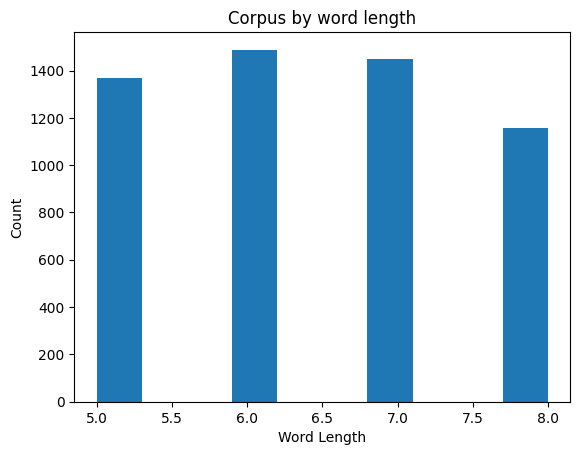

In [14]:
lengths = [len(w) for w in word_df['WORD']]
plt.hist(lengths)
plt.xlabel('Word Length')
plt.ylabel('Count')
plt.title('Corpus by word length')

In [43]:
word_arr = np.array(word_df['WORD'].tolist())
word_to_idx = {word:idx for idx, word in enumerate(word_arr)}

In [44]:
indices = np.random.randint(0, len(word_df), size=3)
print(indices)

[ 282 3231   93]


In [46]:
chosen_words = word_arr[indices]
print(chosen_words)
print([word_to_idx[w] for w in chosen_words])

['example' 'steering' 'special']
[282, 3231, 93]


Let N be the number of words in the repo. Convert a list of words W into digits by computing the sum over 'i' of INDEX(W_i, N) * N^i, where INDEX(X,Y) computes the position of element X in array Y. This essentially amounts to treating words as digits in a base N representation.

In [55]:
def words_to_digits(words):
    indices = [word_to_idx[w] for w in words]
    base = len(word_arr)
    exponents = np.arange(0, len(indices), dtype=np.int64)
    converted_words = indices * np.power(base, exponents)
    return np.sum(converted_words)

In [66]:
def digits_to_words(digits):
    base = len(word_arr)
    exponents = np.array([2,1,0], dtype=np.int64)
    digit_places = np.power(base, exponents)
    remaining_digits = digits
    indices = []
    for d in digit_places:
        index_of_word = int(remaining_digits / d)
        indices.append(index_of_word)
        remaining_digits = remaining_digits - index_of_word * d
    return np.flip(word_arr[indices])

In [67]:
words_to_digits(chosen_words)

2789101644

In [68]:
digits_to_words(2789101644)

array(['example', 'steering', 'special'], dtype='<U8')

In [5]:
!python -m http.server 8000

^C


In [2]:
with open("words.txt") as f:
    words = [line.strip() for line in f if line.strip()]
import json
with open("words.json", "w") as f:
    json.dump(words, f)